In [1]:
from scipy.integrate import trapezoid
from scipy.optimize import show_options

from scipy.constants import epsilon_0, elementary_charge, Boltzmann, Avogadro
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def make_simple_plot(x, y, xlabel, ylabel, title):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    ax.grid()
    plt.show()
    return fig, ax

### Physical constants

1. the electric constant (vacuum permittivity) $\epsilon_0$

In [3]:
epsilon_0

8.8541878128e-12

2. Elementary charge (charge on electron)

In [4]:
elementary_charge

1.602176634e-19

3. Boltzmann constant

In [5]:
Boltzmann

1.380649e-23

### Liquid (model) parameters

Page 62

In [6]:
cap_z = 2
charge = cap_z * elementary_charge

In [7]:
charge

3.204353268e-19

In [8]:
temperature = 1298.0  # Kelvin
concentration = 19.5  # mol dm^{-3}

In [27]:
def calc_kappa(temperature, epsilon, beta_inv, rho):
    return np.sqrt(4 * np.pi / epsilon * beta_inv * rho)

In [28]:
def calc_rho(concentration):
    return concentration * Avogadro

In [29]:
capital_a = 16.274 * 1e-19 # joules
wall_d = 2.97  # inverse Angstrom

In [33]:
beta_inv = Boltzmann * temperature

In [36]:
epsilon = 4 * np.pi * epsilon_0

In [37]:
psi_0 = 0     # 0 mV

In [38]:
rho = calc_rho(concentration)

In [39]:
calc_kappa(temperature, epsilon, beta_inv, rho)

154169115.04820734

### Discretisation

In [ ]:
z_cutoff = 50.0
npoint = 2001
grid_size = z_cutoff / (npoint - 1) 
z = np.linspace(0.0, z_cutoff, npoint)

### Model functions

In [ ]:
# same for both ions

def wall_ion_potential(z):
    return np.exp(-wall_d * z) * capital_a * (wall_d * z + 2)


In [ ]:
phi = wall_ion_potential(z)

In [ ]:
phi

array([3.25480000e-18, 3.13407255e-18, 3.01395622e-18, ...,
       9.12776068e-81, 8.47875917e-81, 7.87590101e-81])

In [ ]:
tz_initial_guess = np.zeros(npoint, dtype=np.float64)    # initial guess of zero - t(z) = ln g(z) + beta phi(z)

In [ ]:
# Assume all of the moments of the short-ranged bulk direct correlation functions to be zero initially

f1z = np.zeros(npoint, dtype=np.float64)
f2z = np.zeros(npoint, dtype=np.float64)

In [ ]:
beta_phi = phi / beta_inv

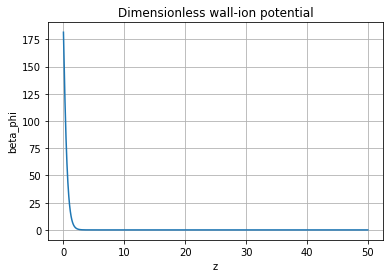

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Dimensionless wall-ion potential'}, xlabel='z', ylabel='beta_phi'>)

In [ ]:
make_simple_plot(z, beta_phi, "z", "beta_phi", "Dimensionless wall-ion potential")

In [ ]:
def singlet_equation_tz(rho, f1z, f2z, z, z_cutoff):
    int_z_inf = trapezoid(y=beta_phi, x=z)
    int_0_z = trapezoid(y=beta_phi, x=z)
    int_0_inf = trapezoid(y=beta_phi, x=z)
    tz = -psi_0 / beta_inv + 2 * np.pi * 
    (rho * z * f1z - f2z + 2 * charge1 * charge2 / epsilon  * int_z_inf + z * int_0_z ) 
    + int_0_inf
    return tz



### Numerical integration

Extended trapezoidal rule

In [ ]:
help(trapezoid)

Help on function trapz in module numpy:

trapz(y, x=None, dx=1.0, axis=-1)
    Integrate along the given axis using the composite trapezoidal rule.
    
    If `x` is provided, the integration happens in sequence along its
    elements - they are not sorted.
    
    Integrate `y` (`x`) along each 1d slice on the given axis, compute
    :math:`\int y(x) dx`.
    When `x` is specified, this integrates along the parametric curve,
    computing :math:`\int_t y(t) dt =
    \int_t y(t) \left.\frac{dx}{dt}\right|_{x=x(t)} dt`.
    
    Parameters
    ----------
    y : array_like
        Input array to integrate.
    x : array_like, optional
        The sample points corresponding to the `y` values. If `x` is None,
        the sample points are assumed to be evenly spaced `dx` apart. The
        default is None.
    dx : scalar, optional
        The spacing between sample points when `x` is None. The default is 1.
    axis : int, optional
        The axis along which to integrate.
    
    R

In [ ]:
int_wall_potential = trapezoid(y=beta_phi, x=z)

In [ ]:
int_wall_potential

91.74188327293258

In [ ]:
show_options(solver="root", method="krylov")

Options
-------
nit : int, optional
    Number of iterations to make. If omitted (default), make as many
    as required to meet tolerances.
disp : bool, optional
    Print status to stdout on every iteration.
maxiter : int, optional
    Maximum number of iterations to make. If more are needed to
    meet convergence, `NoConvergence` is raised.
ftol : float, optional
    Relative tolerance for the residual. If omitted, not used.
fatol : float, optional
    Absolute tolerance (in max-norm) for the residual.
    If omitted, default is 6e-6.
xtol : float, optional
    Relative minimum step size. If omitted, not used.
xatol : float, optional
    Absolute minimum step size, as determined from the Jacobian
    approximation. If the step size is smaller than this, optimization
    is terminated as successful. If omitted, not used.
tol_norm : function(vector) -> scalar, optional
    Norm to use in convergence check. Default is the maximum norm.
line_search : {None, 'armijo' (default), 'wolfe'}